# Medication Compliance of Patients

### Prediction of patients who are likely to miss their medications using Patient information (Age, Gender) , medication prescription period, major disease indicators (Diabetes,TB, Alcoholism etc.)

## Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import Imputer
imputer = Imputer()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import sklearn as sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Exploratory Data Analysis
### Loading data into a Pandas dataframe

In [3]:
df=pd.read_csv('C:/Abzooba/Training Data.csv')

df.head(5)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


### No missing Data found (as seen below) but you need to transform features to make them meaningful. Gender and Adherence features have the type of object 

In [4]:
print('Rows and columns in dataframe : ',df.shape)

print('\n\nInformation about columns and missingness of data : \n')
print(df.info())

Rows and columns in dataframe :  (180212, 11)


Information about columns and missingness of data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB
None


In [5]:
df['Adherence'].replace(to_replace = ['No','Yes'], value = [0,1], inplace = True)

# Another way to change columns in the dataframe
#df['Adherence']= df['Adherence'].astype('category')
#df['Adherence'] = df['Adherence'].cat.codes

In [6]:
df['Gender'].replace(to_replace = ['M','F'], value = [1,0], inplace = True)

In [7]:
# Renaming gender column to keep track of the transformation
df.rename(columns = {'Gender' : 'Gender_M'}, inplace = True)
df.columns

Index(['patient_id', 'Age', 'Gender_M', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder',
       'Adherence'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender_M               180212 non-null int64
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null int64
dtypes: int64(11)
memory usage: 15.1 MB
None


In [9]:
df.tail(5)

,patient_id,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
180207,180208,17,1,84,0,0,0,0,0,0,0
180208,180209,41,1,88,0,0,1,0,0,1,0
180209,180210,48,0,22,0,0,0,0,0,0,1
180210,180211,5,1,104,0,0,0,0,0,0,0
180211,180212,0,1,96,0,0,0,0,0,1,0


### Transformation looks good.
### Now we need to drop patient_id as it is of no meaningful value

In [10]:
df.drop(['patient_id'] , axis = 1, inplace = True)

In [11]:
df.head(5)

,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,19,1,7,0,0,0,0,0,0,0
1,24,0,59,0,0,0,0,0,0,0
2,4,0,43,0,0,0,0,0,0,0
3,38,1,66,0,0,0,0,0,1,0
4,46,0,98,0,0,0,0,0,1,0


## Exploratory analysis to see if any features show a trend for Adherence (target variable)

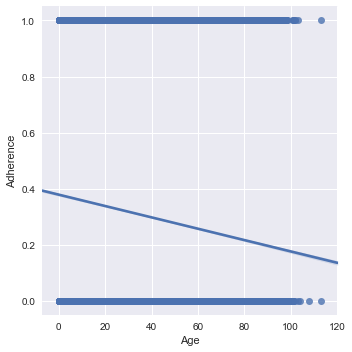

In [42]:
sns.lmplot(y="Adherence", x = 'Age',data=df)
# We see a slight trend of more non Adherence when the age of patient is older but this could be due to other features 
# (due to correlation)

6167


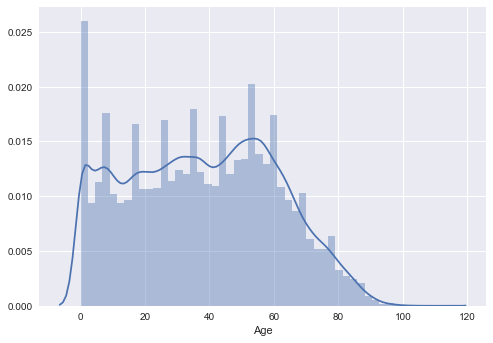

In [50]:
sns.distplot(df["Age"])
print((df['Age'] == 0).sum())
# 6167 records with missing age OR medications for new born children?

In [62]:
# Investigated to see if infants are marked as alcoholics, smokers etc.
df[df['Age']==0].groupby(['Tuberculosis']).aggregate('sum')

,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Sms_Reminder,Adherence
Tuberculosis,,,,,,,,,
0,0,3122,342878,0,0,0,0,3349,1763
1,0,0,28,0,0,0,0,0,2


### RESULTS : Data doesn't have suspicious data points, which means that the Age 0 patients infact are infants , not missing data

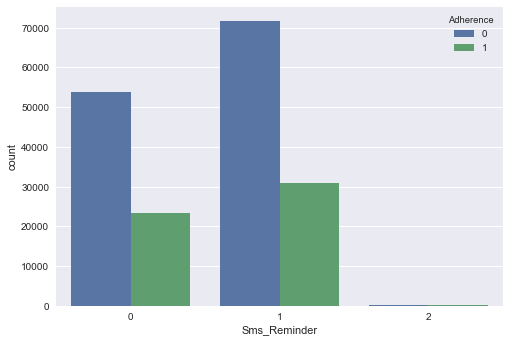

In [63]:
sns.countplot(x='Sms_Reminder', data=df, hue='Adherence')
#sns.countplot(x='Sms_Reminder', data=df[df['Sms_Reminder']==2], hue='Adherence')

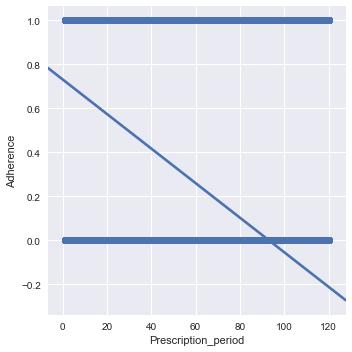

In [17]:
sns.lmplot(y="Adherence", x = 'Prescription_period',data=df )
# There is a stronger trend of non Adherence due to higher Prescription period

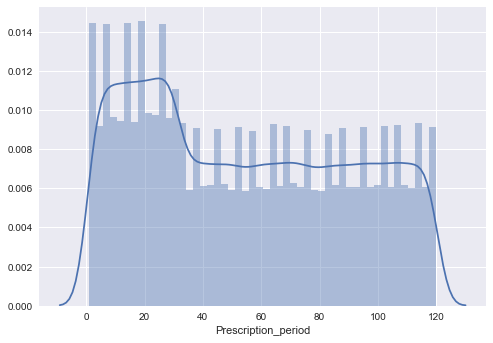

In [40]:
sns.distplot(df["Prescription_period"])
#sns.countplot(x="Prescription_period", data=df, hue = "Adherence")

### Most of the prescriptions are of lesser number of days, which would be natural
## We could strategize about log transformation of Age and Prescription period as they aren't normally distributed

## Other features do not show much effect on Adherence (below) but we would like to have it in the dataframe regardless of that

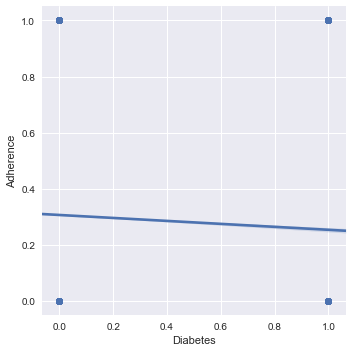

In [45]:
sns.lmplot(y="Adherence", x = 'Diabetes',data=df )

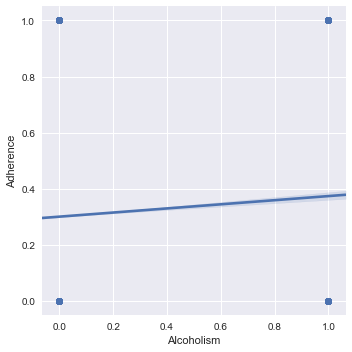

In [46]:
sns.lmplot(y="Adherence", x = 'Alcoholism',data=df )

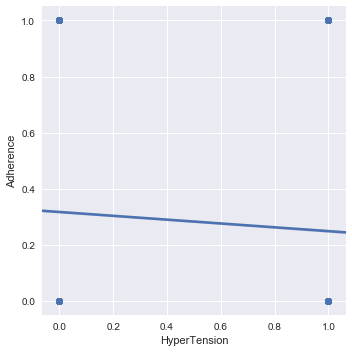

In [47]:
sns.lmplot(y="Adherence", x = 'HyperTension',data=df )

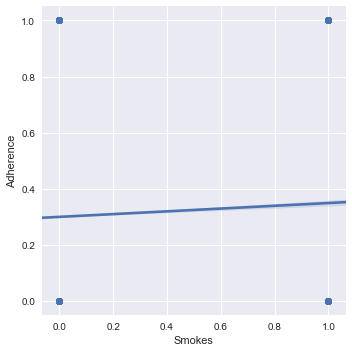

In [48]:
sns.lmplot(y="Adherence", x = 'Smokes',data=df )

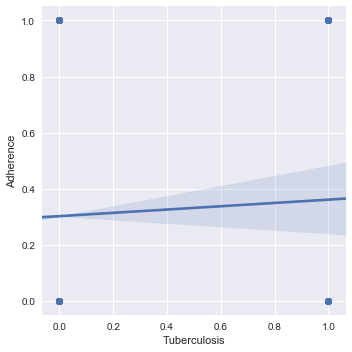

In [49]:
sns.lmplot(y="Adherence", x = 'Tuberculosis',data=df )

### Looking at correlation of features
### It is ok to have correlated features as our interntion is prediction 
#### Note : in case there is a need to analyze which features contribute more towards Adherence, we would like to have a look at this plot closely and plan to reduce features using PCA

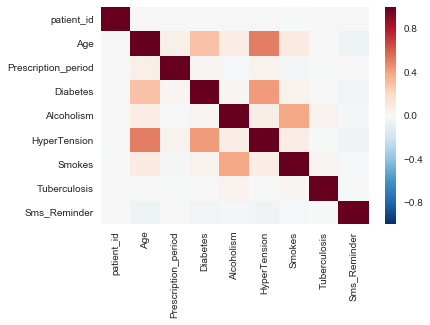

In [23]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Use below code if dataset is huge as it could be more efficient
# plt.matshow(df.corr())

## We see that the classes are unbalanced, i.e. we have more cases of No adherence.
### The classes are inbalanced but they aren't severely imbalanced so we should be good

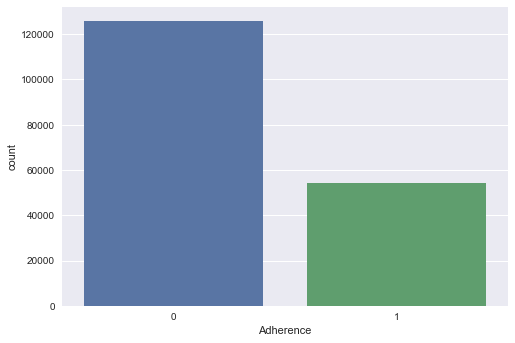

In [19]:
#sns.jointplot("Age", "Adherence", data=df, kind="reg", xlim=(0, 60), ylim=(0, 12), color="r", size=7)
#sns.pairplot(df, hue='Adherence', size=2.5)
#plt.subplots(figsize=(20,15))
#sns.countplot(y="Age", data=df, hue = "Adherence", order = df['Age'])

sns.countplot(x="Adherence", data=df)

## Splitting Data into Train and test sets

In [71]:
X = df.iloc[:, 0:9].values
y = df.iloc[:, -1].values

In [75]:
# Checking if data was split correctly
X[1:4]

array([[24,  0, 59,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 43,  0,  0,  0,  0,  0,  0],
       [38,  1, 66,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [79]:
# One hot encoding of SMS Reminder as it has 3 values
cat_vars=['Sms_Reminder']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['Sms_Reminder']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]

#print(data_final.columns.values)

## Recursive feature elimination to see if any features can be eliminated at this stage

In [81]:
from sklearn import datasets
from sklearn.feature_selection import RFE

data_final_vars=data_final.columns.values.tolist()
y=['Adherence']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)
# NOTE: All features need to be selected for the model

X=data_final[X]
y=data_final[y]

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.364911
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Adherence   No. Observations:               180212
Model:                          Logit   Df Residuals:                   180201
Method:                           MLE   Df Model:                           10
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:                  0.4041
Time:                        14:45:14   Log-Likelihood:                -65761.
converged:                       True   LL-Null:                   -1.1036e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.0089      0.000    -24.786      0.000      -0.010      -0.008
Ge

In [85]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # done
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


## Outputting predictions with prediction probabilities and confusion matrix onto into excel file

In [ ]:
#Predicting for all data points
totpred = logreg.predict(X)
totprob = logreg.predict_proba(X)

#fin_prob=[]
for i in totprob:
    addmax = max(i)
    fin_prob.append(addmax)

res=list(zip(patid,totpred,fin_prob))

#Results innto cvs file
with open('Result.csv', 'w',newline='') as outfile:
    mywriter = csv.writer(outfile)
    
    mywriter.writerow(['Patient_id','Adherence','Probability_score'])
    for d in res:
        mywriter.writerow(d)

#Confusion matrix and precision & recall
from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix')
#print(confusion_matrix)

# classification report
from sklearn.metrics import classification_report
print('\n\nClassification report (0 is NO and 1 is YES)')
print(classification_report(y_test, y_pred))


# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,
logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,
logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area =%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#DECISION TREE
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train.values.ravel())

y_pred2 = dtc.predict(X)
y_prob2 = dtc.predict_proba(X)
print(y_prob2[:20])
from sklearn.metrics import accuracy_score
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y, y_pred2)))
confusion_matrix = confusion_matrix(y, y_pred2)
print('\n\nConfusion matrix')
print(confusion_matrix)


#Writing confusion matrix and metics on Excel file too
import xlwt
# Initialize a workbook 
book = xlwt.Workbook(encoding="utf-8")
aa = float(confusion_matrix[0,0])
ab = float(confusion_matrix[0,1])
ba = float(confusion_matrix[1,0])
bb = float(confusion_matrix[1,1])

# Add a sheet to the workbook 
sheet = book.add_sheet("Confusion matrix")
sheet.write(0, 0, 'Confusion matrix')
sheet.write(1, 2, 'Actual Yes')
sheet.write(1, 3, 'Actual No')
sheet.write(2, 1, 'Predicted Yes')
sheet.write(3, 1, 'Predicted No')
sheet.write(2, 2, aa)
sheet.write(2, 3, ab)
sheet.write(3, 2, ba)
sheet.write(3, 3, bb)
sheet.write(6, 1, 'Precision for Yes')
sheet.write(6, 2, 100*aa/(aa+ab))
sheet.write(7, 1, 'Recall for Yes')
sheet.write(7, 2, 100*aa/(aa+ba))
sheet.write(8, 1, 'Precision for No')
sheet.write(8, 2, 100*bb/(bb+ba))
sheet.write(9, 1, 'Recall for No')
sheet.write(9, 2, 100*bb/(bb+ab))
        
# Save the workbook
book.save("C:\\Abzooba\\Confusion Matrix and Metrics.xls")